## Data : Wind Power Generation Data - Forecasting
 * 2017년 1월 2일 부터 다양한 기상 조건에 대한 시간별 데이터
 * Data From : https://www.kaggle.com/datasets/mubashirrahim/wind-power-generation-data-forecasting

### 1. 데이터 불러오기

- 라이브러리 Import

In [1]:
#기본 라이브러리 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

 - 파일불러오기

In [2]:
df = pd.read_csv('./Location1.csv')
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


<칼럼 설명>
 - Time : 발생한 시간
 - temperature_2m: 표면 위 2미터의 온도(화씨)
 - relativehumidity_2m : 표면 위 2미터의 상대 습도(백분율)
 - dewpoint_2m : 표면 위 2미터에서의 이슬점(화씨)
 - windspeed_10m : 표면 위 10m에서의 풍속(초당 미터)
 - windspeed_100m : 표면 위 100m에서의 풍속(초당 미터)
 - winddirection_10m : 표면 위 10m에서의 풍향(0~360도)
 - winddirection_100m : 표면 위 100미터에서의 풍향(0~360도)
 - windgusts_10m : 표면 위 100미터에서의 돌풍
 - Power : 0과 1 사이로 정규화된 터빈 출력

### 2. 데이터 전처리

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [7]:
df.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


In [8]:
df.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

 - 화씨온도를 섭씨온도로 변환

In [3]:
df['temperature_2m'] = round((df['temperature_2m'] - 32) * 5/9,2)
df['dewpoint_2m'] = round((df['dewpoint_2m'] - 32) * 5/9,2)

### 3. EDA

 - 이상치 탐지
 - 데이터에서 이상치를 탐지하고, 발전량의 이상치에 대한 원인을 파악

In [4]:
# 일간
df_day = df.copy()
df_day['Time'] = df_day['Time'].str[:10]
#월간
df_month = df.copy()
df_month['Time'] = df_month['Time'].str[:7]
#연간
df_year = df.copy()
df_year['Time'] = df_year['Time'].str[:4]

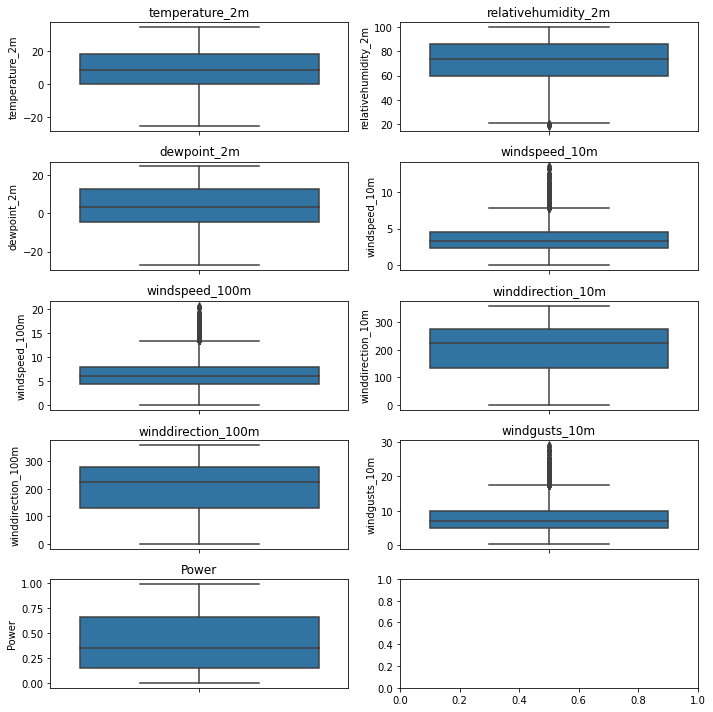

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
axes = axes.flatten()
for i, column in enumerate(df_day.drop('Time',axis=1).columns):
    sns.boxplot(y=df_day.drop('Time',axis=1)[column], ax=axes[i]) 
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

'windspeed_10m','windspeed_100m','winddust_10m' 항목에서 이상치가 발견되긴 하지만 갑작스러운 돌풍으로 인지하고 분석

 - 기상 조건과 발전량의 상관 분석:
 - 'temperature_2m', 'relativehumidity_2m' 항목의 기상 조건 변수들과 'Power' 간의 상관 관계를 분석

In [15]:
df[['temperature_2m','relativehumidity_2m','Power']].corr()

,temperature_2m,relativehumidity_2m,Power
temperature_2m,1.000000,-0.137995,-0.20710
relativehumidity_2m,-0.137995,1.000000,-0.07036
Power,-0.207100,-0.070360,1.00000


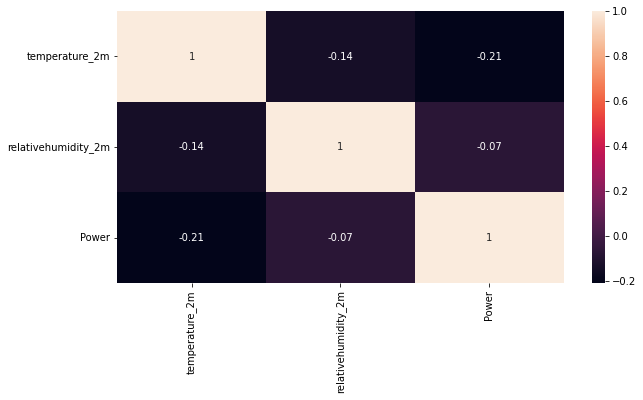

In [16]:
sns.heatmap(df[['temperature_2m','relativehumidity_2m','Power']].corr(),annot = True,fmt = '.2g')
plt.gcf().set_size_inches(10,5)

온도와 습도로 인한 발전량의 상관관계는 없다.

 - 기상 조건과 발전량의 상관 분석:
 - 'temperature_2m', 'relativehumidity_2m', 'windspeed_10m' 등의 기상 조건 변수들과 'Power' 간의 상관 관계를 분석, 특히 풍속과 발전량 간의 관계를 중점적으로 분석

In [17]:
df[['windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m' ,'Power']].corr()

,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
windspeed_10m,1.000000,0.932981,0.170281,0.182164,0.936677,0.732801
windspeed_100m,0.932981,1.000000,0.160404,0.176354,0.819065,0.778704
winddirection_10m,0.170281,0.160404,1.000000,0.898239,0.163340,0.157623
winddirection_100m,0.182164,0.176354,0.898239,1.000000,0.173228,0.171619
windgusts_10m,0.936677,0.819065,0.163340,0.173228,1.000000,0.662677
Power,0.732801,0.778704,0.157623,0.171619,0.662677,1.000000


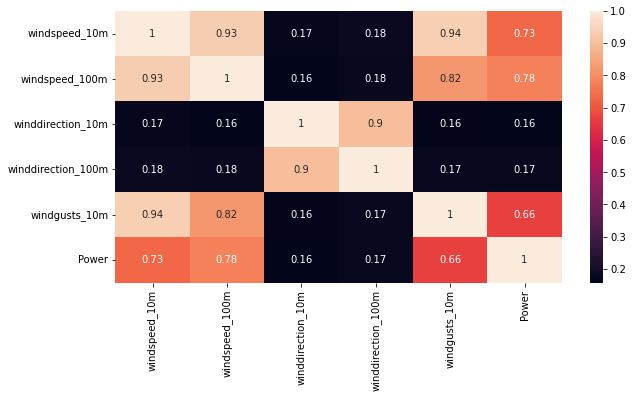

In [18]:
sns.heatmap(df[['windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m','Power']].corr(),annot = True,fmt = '.2g')
plt.gcf().set_size_inches(10,5)

발전량은 풍속과의 관계가 상관관계가 있고, 방향과는 상관관계가 없다.

 - 기온 변화와 발전량의 관계:
 - 'temperature_2m'와 'Power' 간의 관계를 분석하여 기온이 발전량에 미치는 영향을 확인

In [19]:
df_day_m = df_day.groupby('Time')[['temperature_2m','Power']].agg('mean').reset_index()
df_day_m.head()

,Time,temperature_2m,Power
0,2017-01-02,0.264167,0.194150
1,2017-01-03,2.688750,0.230358
2,2017-01-04,-6.678750,0.868033
3,2017-01-05,-11.977083,0.698042
4,2017-01-06,-14.650417,0.322771


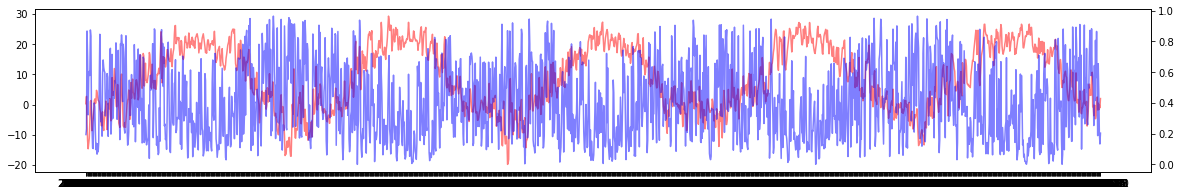

In [20]:
fig, ax1 = plt.subplots()
ax1.plot( df_day_m['Time'], df_day_m['temperature_2m'], color = 'red', alpha = 0.5)

ax2 = ax1.twinx()
ax2.plot( df_day_m['Time'], df_day_m['Power'], color = 'blue', alpha = 0.5)
plt.gcf().set_size_inches(20,3)
plt.show()

기온변화에 따른 발전량은 시각적인관점으로는 관계가 없다.

- 시간대별 풍속 및 발전량 변화:
- 특정 시간대에 풍속과 발전량이 어떻게 변하는지 확인하여 특정 시간대에 발전량이 높거나 낮은 이유를 분석

In [21]:
df_wp = df[['Time','windspeed_10m','windspeed_100m','Power']]
df_wp.head()

,Time,windspeed_10m,windspeed_100m,Power
0,2017-01-02 00:00:00,1.44,1.26,0.1635
1,2017-01-02 01:00:00,2.06,3.99,0.1424
2,2017-01-02 02:00:00,1.30,2.78,0.1214
3,2017-01-02 03:00:00,1.30,2.69,0.1003
4,2017-01-02 04:00:00,2.47,4.43,0.0793


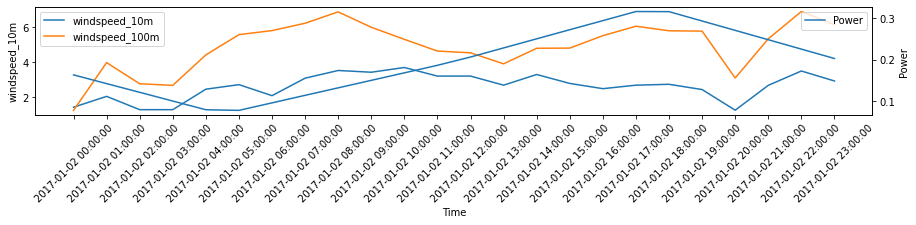

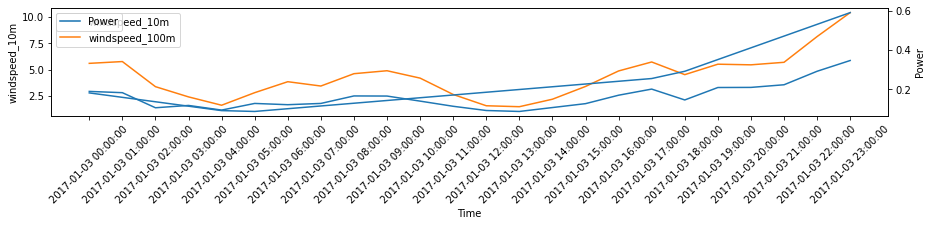

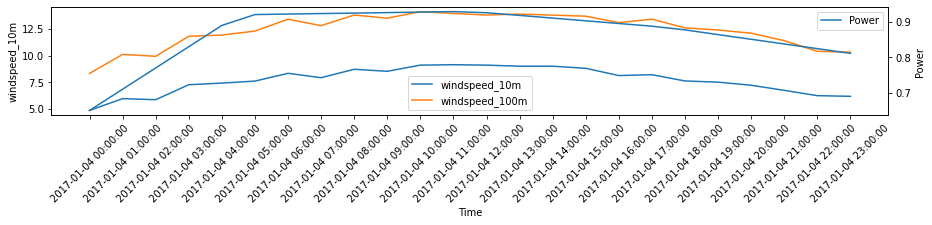

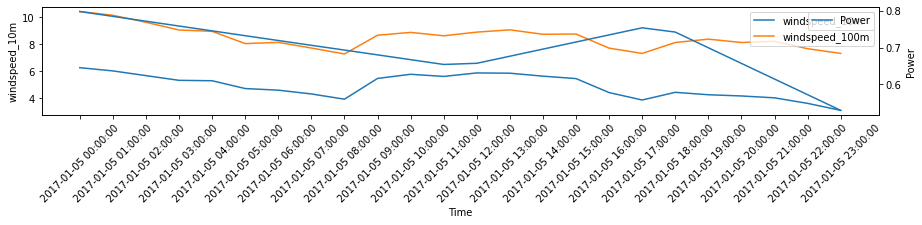

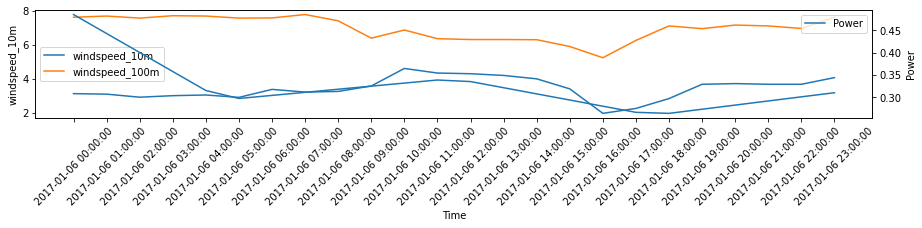

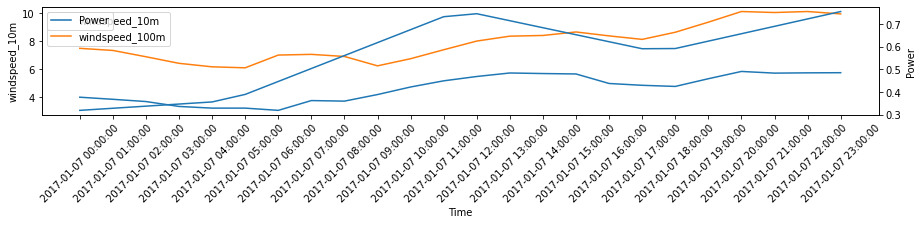

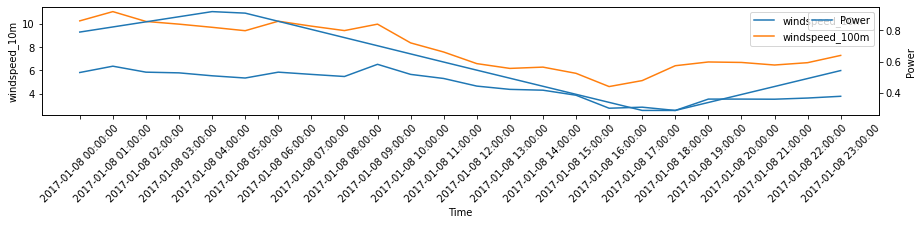

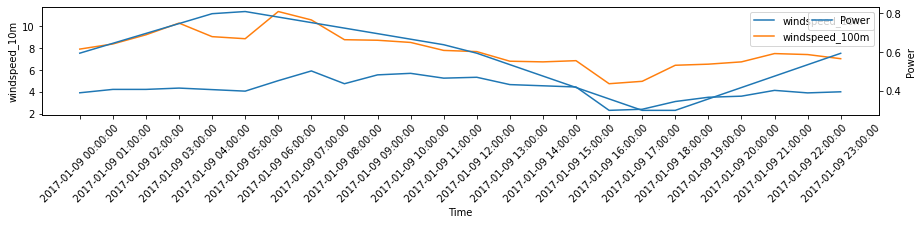

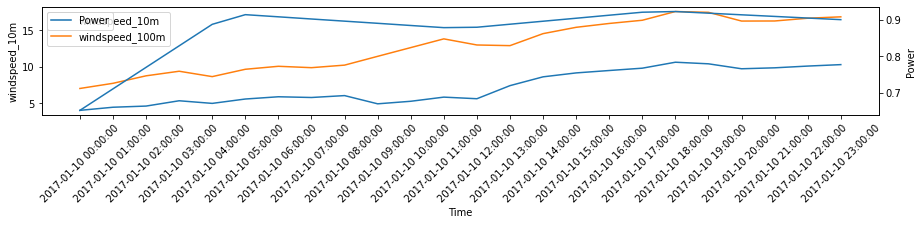

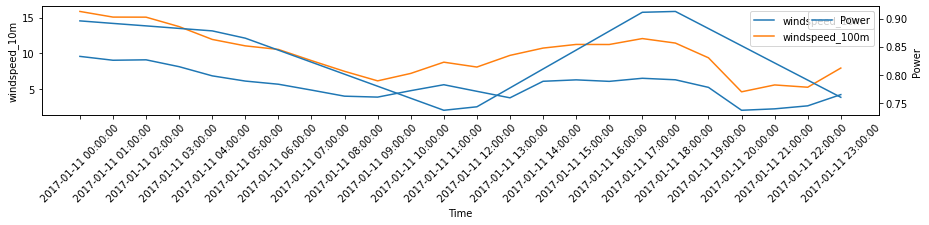

In [22]:
for i in range(0,10):
    plt.figure(figsize=(15, 2))
    ax1 = sns.lineplot(x='Time', y='windspeed_10m', data=df_wp[i*24:(i+1)*24], label='windspeed_10m')
    ax2 = sns.lineplot(x='Time', y='windspeed_100m', data=df_wp[i*24:(i+1)*24], label='windspeed_100m')
    plt.xticks(rotation=45)
    ax3 = ax1.twinx()
    sns.lineplot(x='Time', y='Power', data=df_wp[i*24:(i+1)*24],ax=ax3, label='Power')
    plt.legend()
    plt.show()

10일간 풍속과 발전량을 시각적으로 보았을때 특정시간에 보이는 특징은 없다.

- 풍속 범주화:
- 'windspeed_10m' 등의 풍속을 특정 범주로 나누어서 (예: 저풍속, 중풍속, 고풍속) 각 범주에 대한 발전량의 평균을 분석

<Axes: xlabel='windspeed_10m', ylabel='Density'>

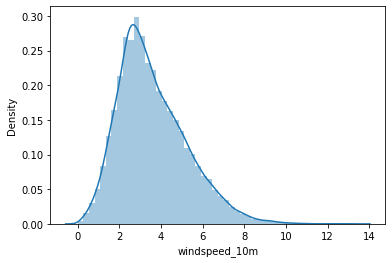

In [23]:
sns.distplot(df_day['windspeed_10m'])

In [5]:
df_day['10m_wind'] = np.where(df_day['windspeed_10m']<=2,'low',
                              np.where(df_day['windspeed_10m'] <=4,'mid',
                              np.where(df_day['windspeed_10m'],'high','none')))

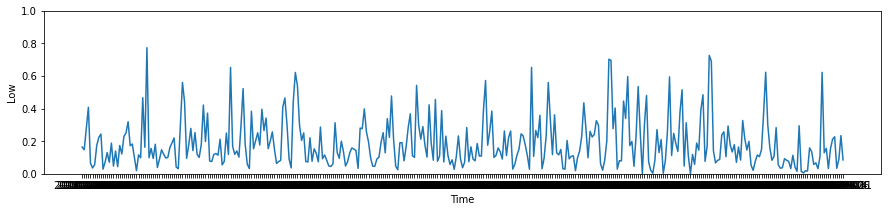

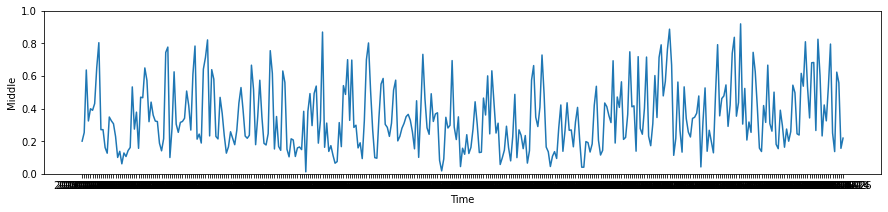

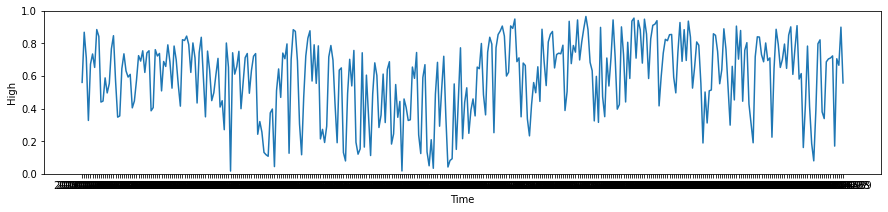

In [26]:
plt.figure(figsize = (15,3))
sns.lineplot(data = df_day[df_day['10m_wind'] =='low'].groupby('Time')['Power'].agg('mean').reset_index()[:365],x = 'Time',y='Power')
plt.ylim(0,1)
plt.ylabel('Low')
plt.show()
plt.figure(figsize = (15,3))
sns.lineplot(data = df_day[df_day['10m_wind'] =='mid'].groupby('Time')['Power'].agg('mean').reset_index()[:365],x = 'Time',y='Power')
plt.ylim(0,1)
plt.ylabel('Middle')
plt.show()
plt.figure(figsize = (15,3))
sns.lineplot(data = df_day[df_day['10m_wind'] =='high'].groupby('Time')['Power'].agg('mean').reset_index()[:365],x = 'Time',y='Power')
plt.ylim(0,1)
plt.ylabel('High')
plt.show()

- 계절별 분석:
- 데이터를 계절에 따라 나누어 'temperature_2m' 및 'Power'의 계절적 변화를 분석, 계절에 따라 발전량이나 풍속의 패턴이 어떻게 변하는지 확인

In [6]:
df_month['season'] = np.where(df_month['Time'].str[-2:].isin(['12','01','02']),'winter',
                              np.where(df_month['Time'].str[-2:].isin(['03','04','05']),'spring',
                              np.where(df_month['Time'].str[-2:].isin(['06','07','08']),'summer','fall')))

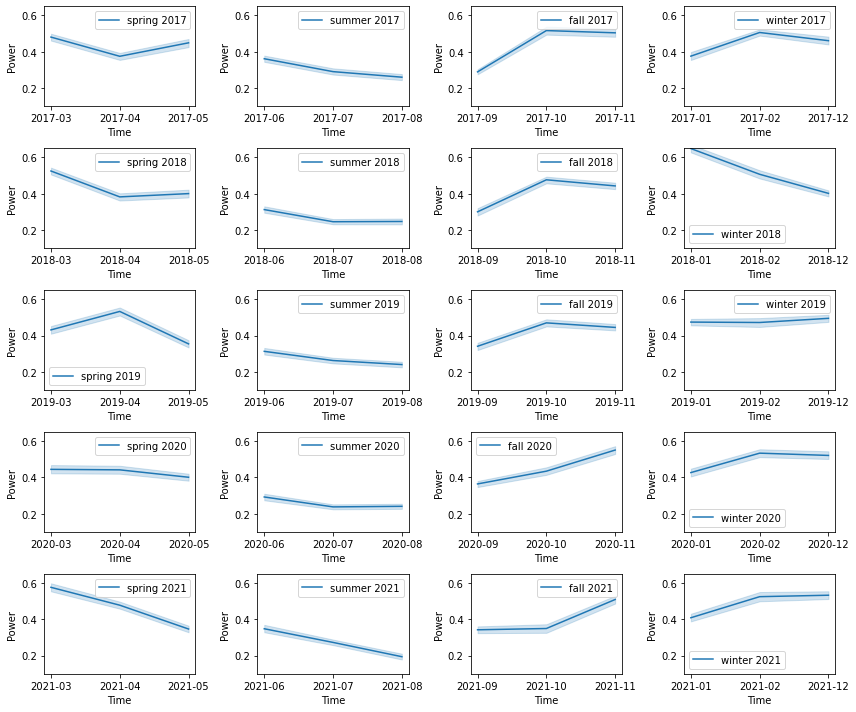

In [7]:
seasons = ['spring', 'summer', 'fall', 'winter']
years = ['2017', '2018', '2019', '2020','2021']

fig, axes = plt.subplots(5, 4, figsize=(12, 10))

for i, year in enumerate(years):
    for j, season in enumerate(seasons):
        data_to_plot = df_month[(df_month['season'] == season) & df_month['Time'].str[:4].isin([year])]
        ax = axes[i, j]
        sns.lineplot(data=data_to_plot, x='Time', y='Power', label=f'{season} {year}', ax=ax)
        ax.set_ylim(0.10, 0.65)
        ax.legend()

plt.tight_layout()
plt.show()


발전량을 계절별로 시각적으로 확인한 결과 여름에 발전량이 최저점이고 가을 중순부터 발전량이 증가하여 봄 중순에 감소하는 현상을 확인

### 4. 머신러닝 모델 구축

- 각 항목들과 RandomForestRegressor을 사용하여 발전량을 예측하는 머신러닝 모델을 구축

In [55]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor as RFR

In [56]:
df_dm =df_day.groupby(['Time']).agg('mean').reset_index()
df_dm = df_dm.drop('Time',axis =1)
df_dm.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,0.264167,86.041667,-1.860833,2.635417,4.937083,91.791667,102.125000,5.391667,0.194150
1,2.688750,98.833333,2.505833,2.413333,4.348333,160.250000,171.833333,5.033333,0.230358
2,-6.678750,63.208333,-12.794167,7.679167,12.374583,270.125000,272.000000,15.987500,0.868033
3,-11.977083,58.125000,-18.619583,4.898333,8.497917,254.750000,259.208333,10.387500,0.698042
4,-14.650417,62.708333,-20.323333,3.430000,6.977917,248.041667,255.291667,6.762500,0.322771


In [57]:
scaler = StandardScaler()
x = df_dm[df_dm.columns.difference(['Power'])]
y = df_dm['Power']
x_scaled = scaler.fit_transform(x)

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.3,random_state=123)

- 커스텀 하지 않은 기본 모델

In [59]:
algorithm = RFR
algorithm_name = 'rfr'

In [60]:
def modeling_uncustomized(algorithm, x_train, y_train, x_test, y_test):
    uncustomized = algorithm(random_state=1234)
    uncustomized.fit(x_train, y_train)
    
    y_pred_train = uncustomized.predict(x_train)
    y_pred_test = uncustomized.predict(x_test)
    
    train_score_before = mean_squared_error(y_train, y_pred_train).round(3)
    test_score_before = mean_squared_error(y_test, y_pred_test).round(3)
    
    df_un_pred = pd.DataFrame({'y_test': y_test,'pred':y_pred_test})
    df_un_pred

    plt.figure(figsize = (20,3))
    sns.lineplot(data = df_un_pred[:100],x= df_un_pred[:100].index,y = 'y_test')
    sns.lineplot(data = df_un_pred[:100],x= df_un_pred[:100].index,y = 'pred')
    
    print(f"학습 데이터셋 MSE: {train_score_before}")
    print(f"테스트 데이터셋 MSE: {test_score_before}")
    
    return train_score_before, test_score_before



학습 데이터셋 MSE: 0.002
테스트 데이터셋 MSE: 0.012


(0.002, 0.012)

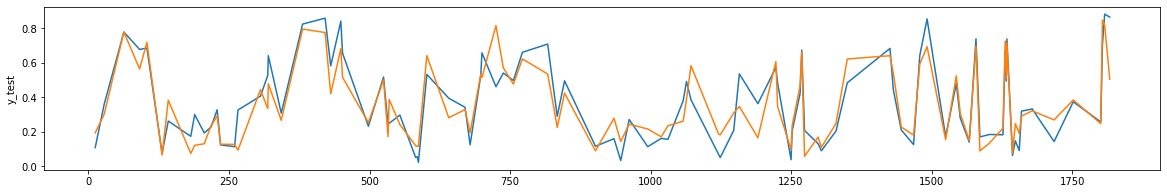

In [61]:
modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test)

- 하이퍼파라미터별 모델 성능 시각화 함수

In [62]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel):
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') 
    plt.xlabel(xlabel) 
    plt.legend() 
    plt.gcf().set_size_inches(8,3)

- 모델 최적화 함수: 학습할 트리 모델 개수 선정

In [75]:
def optimi_estimator(algorithm, algorithm_name,x_train,y_train, x_test,y_test,n_estimator_min,n_estimator_max):
    train_score =[]; test_score =[]
    para_n_tree =[n_tree*5 for n_tree in range(n_estimator_min,n_estimator_max)]
    
    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators,random_state =1234)
        model.fit(x_train,y_train)
        train_score.append(model.score(x_train,y_train))
        test_score.append(model.score(x_test,y_test))
    
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree,'TrainScore': train_score,'TestScore': test_score})
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator")
    print(round(df_score_n,4))
    

- 모델 최적화 함수: 최대 깊이 선정

In [76]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth")
    print(round(df_score_n, 4))

- 모델 최적화 함수: 분리 노드의 최소 자료 수 선정

In [77]:
def optimi_minsplit(algorithm,algorithm_name,x_train,y_train,x_test,y_test,n_split_min,n_split_max,n_estimator,n_depth):
    train_score =[]; test_score=[]
    para_split = [n_split*2 for n_split in range(n_split_min,n_split_max)]
    
    for v_min_samples_split in para_split:

        model = algorithm(min_samples_split = v_min_samples_split,
                             n_estimators = n_estimator,
                              max_depth = n_depth,
                             random_state = 1234)
        model.fit(x_train,y_train)
        train_score.append(model.score(x_train,y_train))
        test_score.append(model.score(x_test,y_test))
        
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node")
    print(round(df_score_n,4))
   
        
        

- 모델 최적화 함수: 잎사귀 노드의 최소 자료 수 선정

In [78]:
def optimi_minleaf(algorithm,algorithm_name,x_train,y_train,x_test,y_test,n_leaf_min,n_leaf_max,n_estimator,n_depth,n_split):
    train_score =[]; test_score=[]
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min,n_leaf_max)]
    
    for v_min_samples_leaf in para_leaf:
        model = algorithm(min_samples_leaf = v_min_samples_leaf,
                              n_estimators = n_estimator,
                             max_depth = n_depth,
                             min_samples_split = n_split,
                             random_state = 1234)
        model.fit(x_train,y_train)
        train_score.append(model.score(x_train,y_train))
        test_score.append(model.score(x_test,y_test))
        
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf,'TrainScore': train_score,'TestScore':test_score})
    optimi_visualization(algorithm_name,para_leaf,train_score,test_score, "The minimum number of samples required to be at a leaf node")
    print(round(df_score_n,4))
        
        

- 최종 모델 학습

In [79]:
def model_final(algorithm,algorithm_name,x_train,y_train,x_test,y_test,n_estimator,n_depth,n_split,n_leaf):
    model = algorithm(random_state= 1234,
                        min_samples_leaf = n_leaf,
                        min_samples_split = n_split,
                        n_estimators = n_estimator,
                        max_depth = n_depth)
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)    
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.3f}')
       
    df_score_n = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    df_score_n = df_score_n.sort_index(ascending=True)
    plt.figure(figsize = (20,3))
    sns.lineplot(data = df_score_n[:100],x= df_score_n[:100].index,y = 'y_test')
    sns.lineplot(data = df_score_n[:100],x= df_score_n[:100].index,y = 'y_pred')
    print(round(df_score_n,4))

- 모델 최적화: (1) 학습할 트리 개수 선정

    n_estimators  TrainScore  TestScore
0              5      0.9375     0.7401
1             10      0.9593     0.7683
2             15      0.9627     0.7775
3             20      0.9644     0.7801
4             25      0.9662     0.7838
5             30      0.9674     0.7847
6             35      0.9678     0.7872
7             40      0.9681     0.7890
8             45      0.9686     0.7880
9             50      0.9687     0.7892
10            55      0.9690     0.7889
11            60      0.9693     0.7888
12            65      0.9697     0.7898
13            70      0.9700     0.7896
14            75      0.9701     0.7884
15            80      0.9702     0.7880
16            85      0.9700     0.7894
17            90      0.9701     0.7899
18            95      0.9703     0.7903
19           100      0.9702     0.7907
20           105      0.9702     0.7907
21           110      0.9705     0.7908
22           115      0.9706     0.7911
23           120      0.9706     0.7915


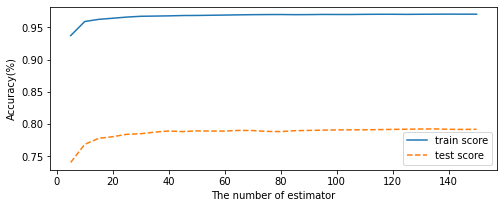

In [71]:
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm,algorithm_name,
                x_train,y_train,x_test,y_test,
                n_estimator_min,n_estimator_max)

In [72]:
n_estimator=30

- 모델 최적화: (2) 최대 깊이

    depth  TrainScore  TestScore
0       1      0.6683     0.6574
1       2      0.7898     0.7871
2       3      0.8109     0.7990
3       4      0.8308     0.8003
4       5      0.8529     0.7981
5       6      0.8761     0.7981
6       7      0.8989     0.7956
7       8      0.9175     0.7927
8       9      0.9325     0.7899
9      10      0.9445     0.7878
10     11      0.9528     0.7851
11     12      0.9586     0.7873
12     13      0.9625     0.7879
13     14      0.9646     0.7861
14     15      0.9662     0.7860
15     16      0.9665     0.7873
16     17      0.9667     0.7852
17     18      0.9669     0.7821
18     19      0.9674     0.7819
19     20      0.9672     0.7847


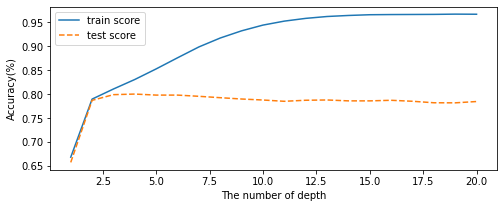

In [80]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm,algorithm_name,
                x_train,y_train,x_test,y_test,
                depth_min,depth_max,n_estimator)

In [81]:
n_depth = 4

- 모델 최적화: (3) 분리 노드의 최소 자료 수

    min_samples_split  TrainScore  TestScore
0                   2      0.8308     0.8003
1                   4      0.8306     0.8003
2                   6      0.8305     0.8002
3                   8      0.8305     0.8002
4                  10      0.8305     0.8002
5                  12      0.8305     0.8002
6                  14      0.8305     0.8002
7                  16      0.8305     0.8002
8                  18      0.8300     0.8001
9                  20      0.8300     0.8001
10                 22      0.8298     0.8000
11                 24      0.8296     0.8001
12                 26      0.8294     0.8002
13                 28      0.8293     0.8002
14                 30      0.8293     0.8002
15                 32      0.8293     0.8002
16                 34      0.8293     0.8003
17                 36      0.8290     0.8005
18                 38      0.8290     0.8005
19                 40      0.8288     0.8005
20                 42      0.8288     0.8005
21        

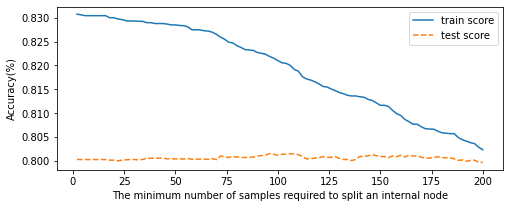

In [83]:
n_split_min = 1
n_split_max = 101
optimi_minsplit(algorithm,algorithm_name,
               x_train,y_train,x_test,y_test,
               n_split_min,n_split_max,n_estimator,n_depth)

In [84]:
n_split = 200

- 모델 최적화: (4) 잎사귀 노드의 최소 자료 수

    min_samples_leaf  TrainScore  TestScore
0                  2      0.8023     0.7996
1                  4      0.8023     0.7996
2                  6      0.8023     0.7996
3                  8      0.8023     0.7997
4                 10      0.8023     0.7997
5                 12      0.8023     0.7997
6                 14      0.8023     0.7997
7                 16      0.8023     0.7997
8                 18      0.8023     0.7997
9                 20      0.8023     0.7997
10                22      0.8022     0.7997
11                24      0.8022     0.7997
12                26      0.8022     0.7997
13                28      0.8022     0.7997
14                30      0.8022     0.7997
15                32      0.8022     0.7997
16                34      0.8022     0.7997
17                36      0.8022     0.7997
18                38      0.8022     0.7997
19                40      0.8022     0.7997
20                42      0.8022     0.7997
21                44      0.8022

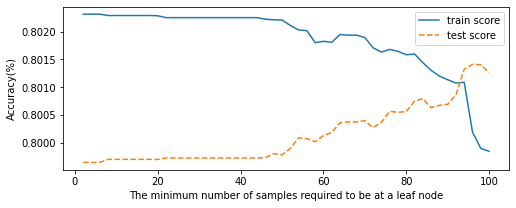

In [85]:
n_leaf_min=1
n_leaf_max = 51
optimi_minleaf(algorithm,algorithm_name,
              x_train,y_train,x_test,y_test,
              n_leaf_min,n_leaf_max,n_estimator,n_depth,n_split)

In [86]:
n_leaf = 92

- 최종 모델 학습

Mean Squared Error: 0.011
      y_test  y_pred
0     0.1942  0.2568
5     0.5698  0.5826
12    0.1088  0.1375
13    0.1029  0.1556
15    0.3999  0.4817
...      ...     ...
1815  0.8071  0.7618
1817  0.8653  0.5051
1818  0.4652  0.3774
1822  0.2020  0.3053
1824  0.2032  0.2350

[548 rows x 2 columns]


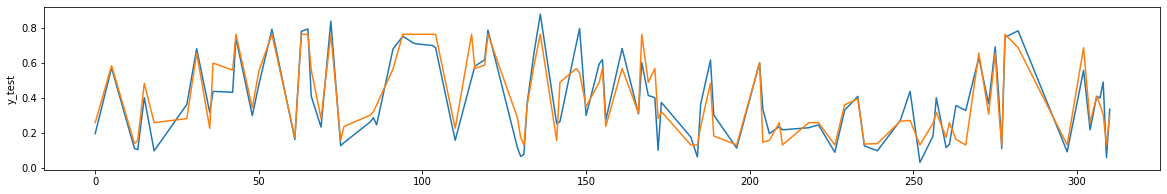

In [87]:
model_final(algorithm,algorithm_name,
           x_train,y_train,x_test,y_test,
           n_estimator,n_depth,n_split,n_leaf)